In [72]:
#pip install panda

In [73]:
import pandas as pd
import numpy as np

df = pd.read_csv("social_media_data.csv")
df.head()


,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,addiction,addicted
0,56,male,5,LinkedIn,Health & Wellness,United Kingdom,Urban,Teacher,60000.0,True,False,False,False,True
1,46,female,5,TikTok,Home Improvement,United Kingdom,Urban,Artist,40000.0,True,True,True,False,True
2,32,male,5,YouTube,Home Improvement,Australia,Sub_Urban,Student,30000.0,False,False,False,False,True
3,60,non-binary,4,Facebook,Health & Wellness,United Kingdom,Urban,Software Engineer,90000.0,False,True,False,False,False
4,25,male,7,LinkedIn,Gaming,Australia,Urban,Student,24000.0,False,True,True,True,True


In [74]:
#How many rows and columns  
df.shape

(1000, 14)

In [75]:
#What type of data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1000 non-null   int64  
 1   gender        1000 non-null   object 
 2   time_spent    1000 non-null   int64  
 3   platform      1000 non-null   object 
 4   interests     1000 non-null   object 
 5   location      1000 non-null   object 
 6   demographics  1000 non-null   object 
 7   profession    1000 non-null   object 
 8   income        1000 non-null   float64
 9   indebt        1000 non-null   bool   
 10  isHomeOwner   1000 non-null   bool   
 11  Owns_Car      1000 non-null   bool   
 12  addiction     1000 non-null   bool   
 13  addicted      1000 non-null   bool   
dtypes: bool(5), float64(1), int64(2), object(6)
memory usage: 75.3+ KB


In [76]:
#summary statistics 
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.866000,73088.000000
std,13.497852,1.735239,28376.248298
min,18.000000,3.000000,24000.000000
25%,29.000000,5.000000,48000.000000
50%,42.000000,6.000000,80000.000000
75%,52.000000,7.000000,95000.000000
max,64.000000,9.000000,120000.000000


In [77]:
# check for missing data
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
addiction       0
addicted        0
dtype: int64

In [78]:
# find the count of unique values in the demographics column
df['demographics'].value_counts()

demographics
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64

In [79]:
# find the count of unique values in the location column
df['location'].value_counts()

location
Australia         352
United Kingdom    329
United States     319
Name: count, dtype: int64

In [80]:
# find the count of unique values in the platform column
df['platform'].value_counts()

platform
Facebook     191
WhatsApp     183
YouTube      140
Twitter      137
LinkedIn     128
Instagram     61
Snapchat      60
TikTok        50
Pinterest     50
Name: count, dtype: int64

In [81]:
# find the count of unique values in the profession column
df['profession'].value_counts()

profession
Software Engineer    117
Marketer Manager     108
Chef                 106
Student              105
Lawyer               101
Engineer              98
Teacher               95
Artist                94
Scientist             93
Doctor                83
Name: count, dtype: int64

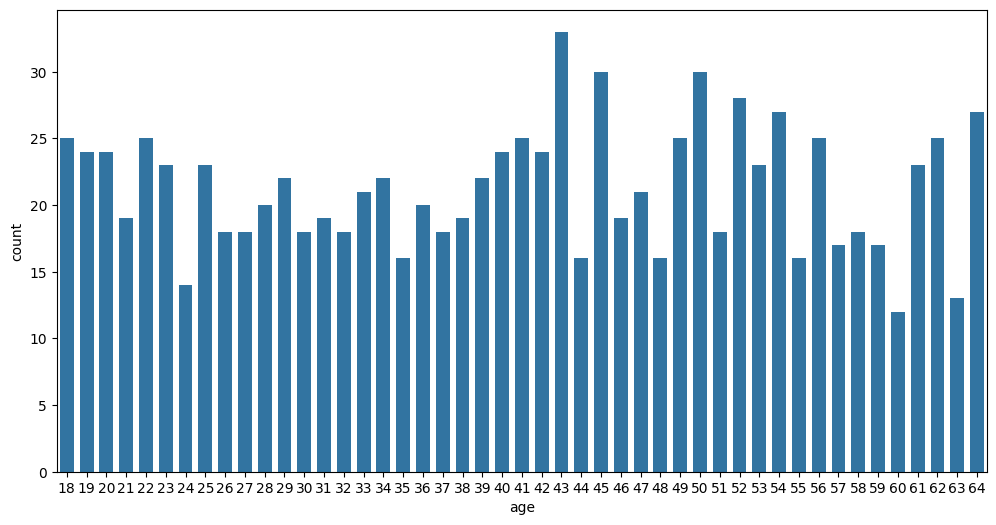

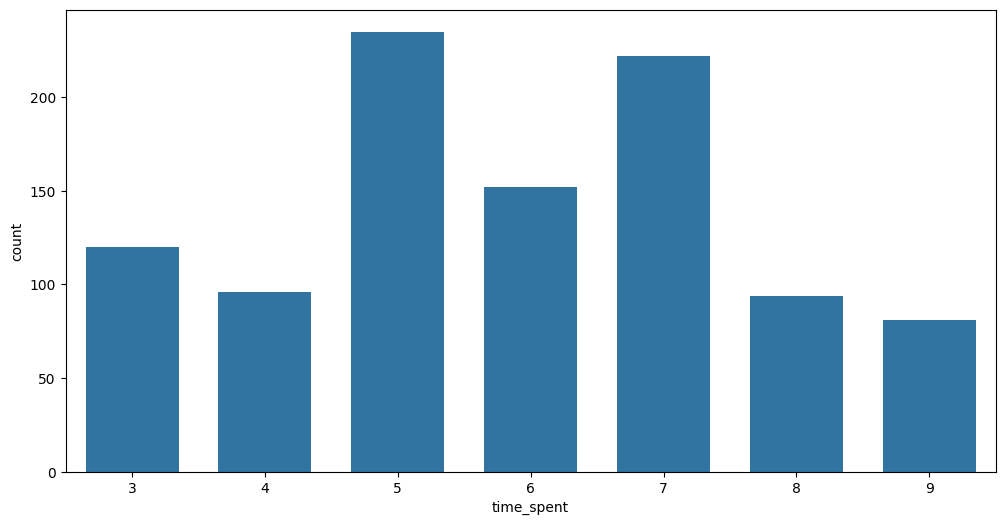

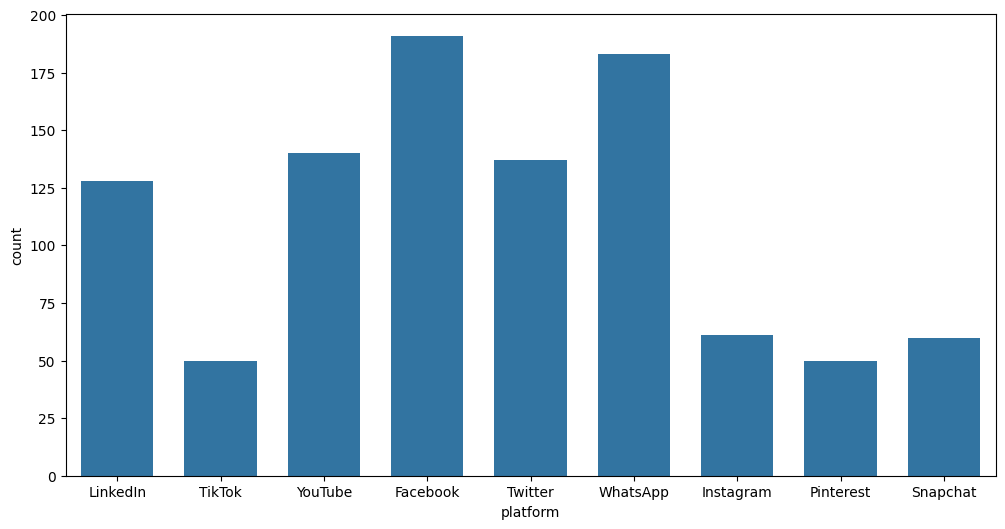

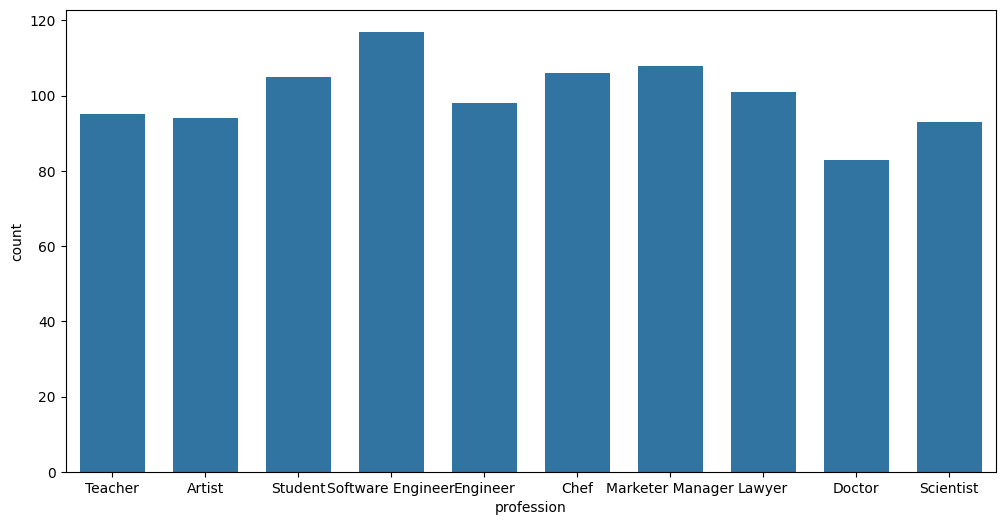

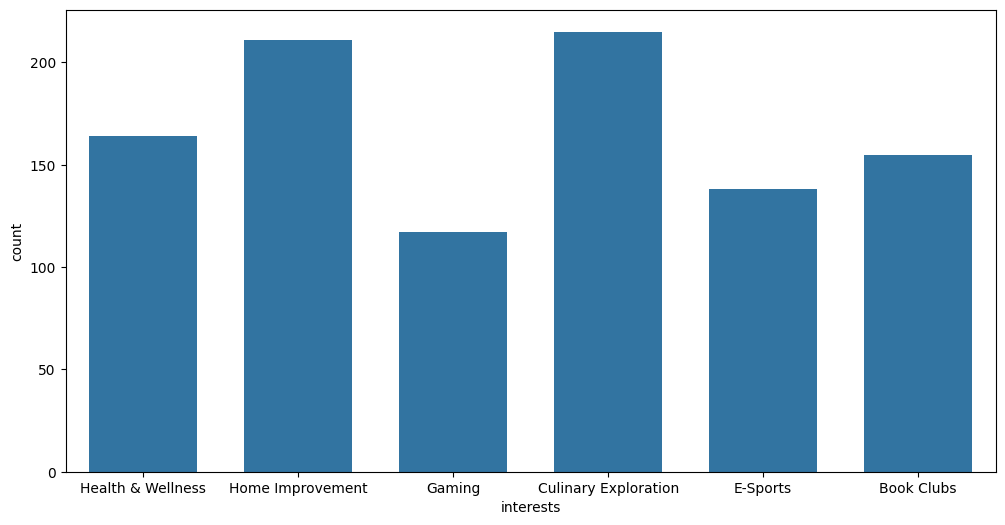

In [89]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=df, width=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='time_spent', data=df, width=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='platform', data=df, width=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='profession', data=df, width=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='interests', data=df, width=0.7)
plt.show()

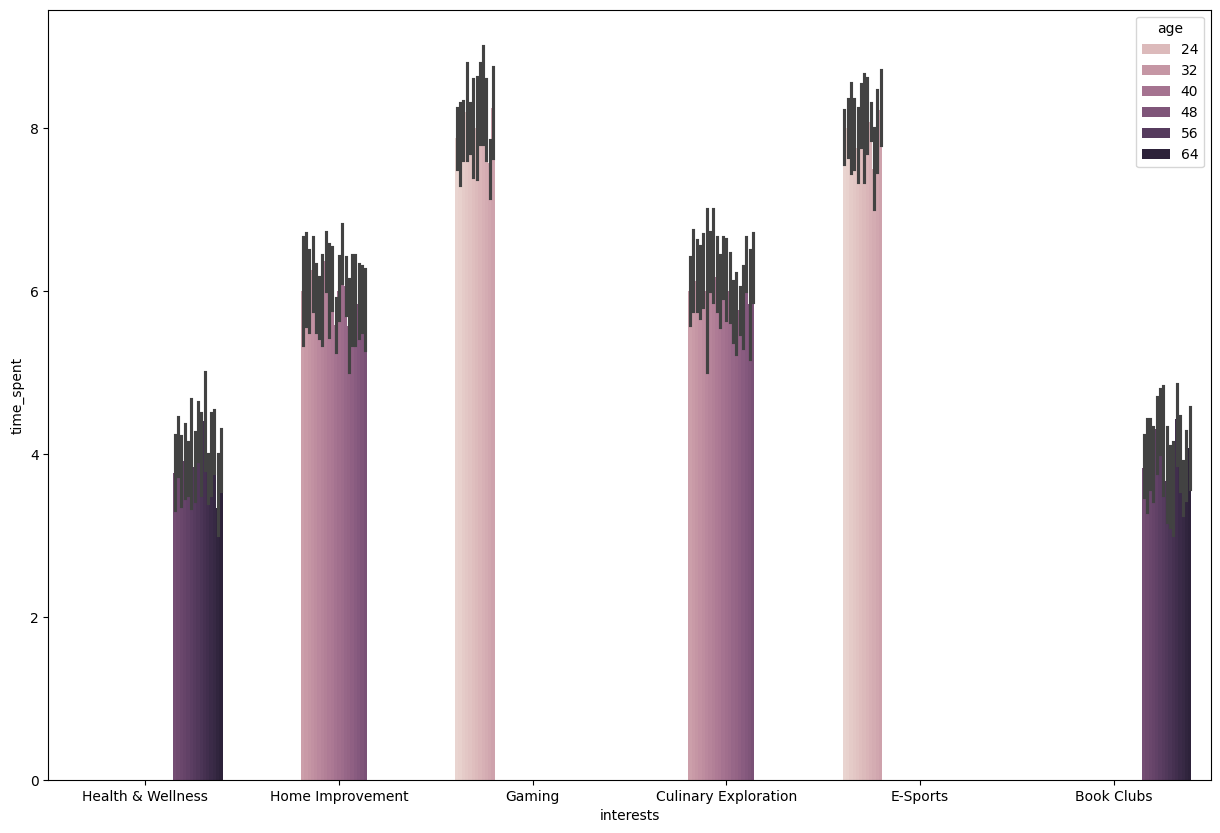

In [83]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df,x='interests',y='time_spent',hue='age')
plt.show()

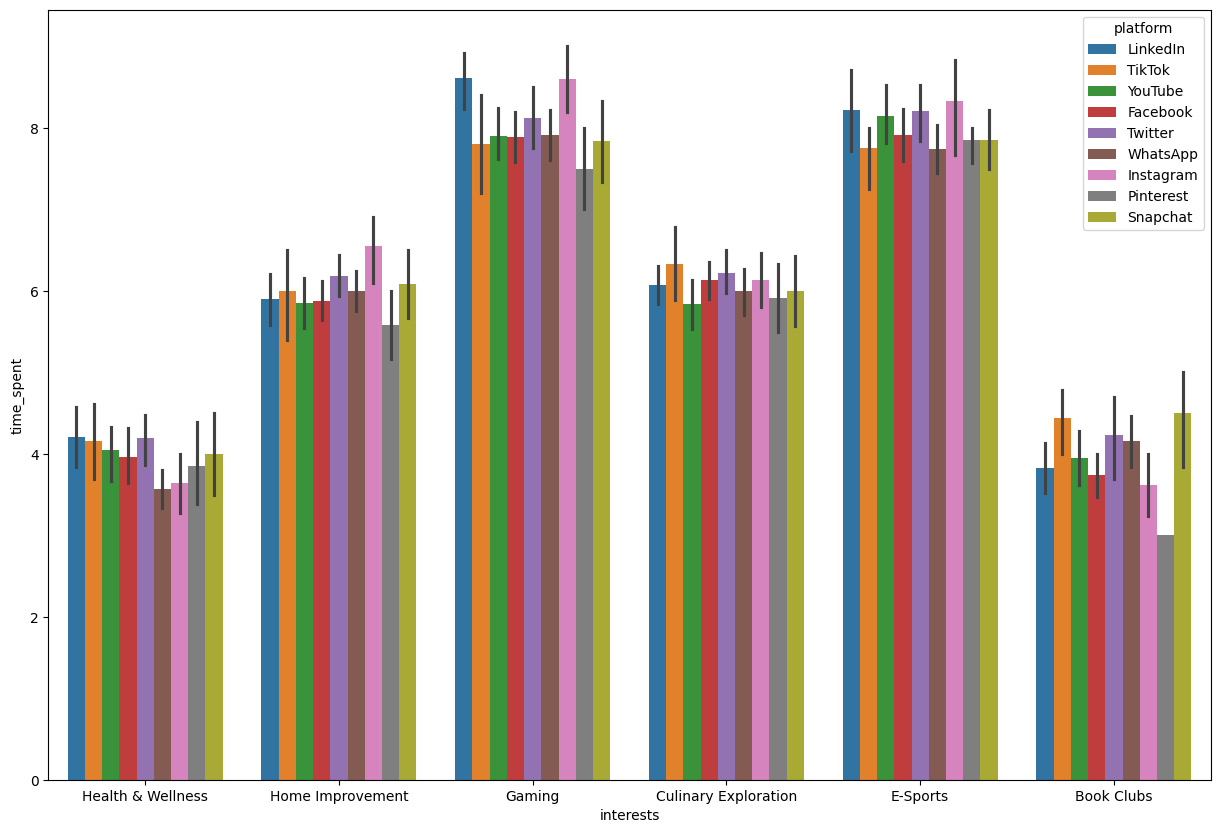

In [84]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df,x='interests',y='time_spent',hue='platform')
plt.show()

C:\Users\prais\AppData\Local\Temp\ipykernel_21956\3669940225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['age_group'] = df['age_group']


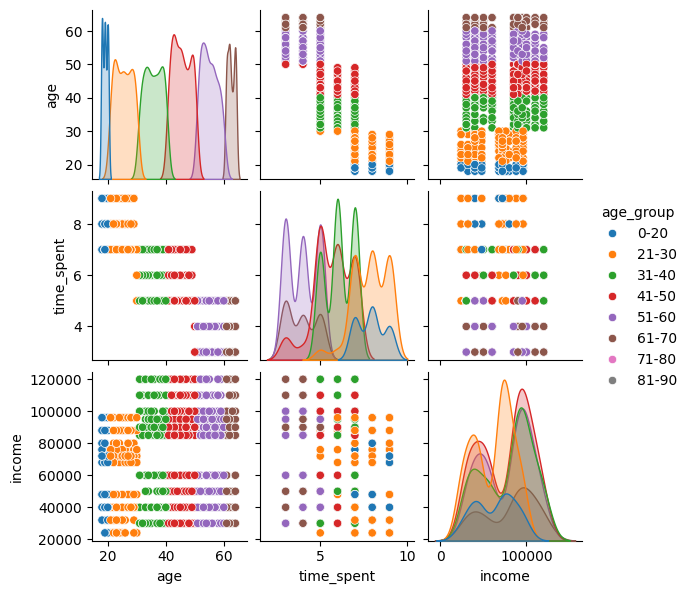

In [85]:
age_bins = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])
df['age_group'] = age_bins

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]
df_numeric['age_group'] = df['age_group']  

sns.pairplot(df_numeric, hue='age_group', height=2)
plt.show()

In [86]:
# Multiple Regression Analysis 

In [87]:
# Clustering 